In [ ]:
! pip install geopandas
! pip install folium matplotlib mapclassify
! pip install pointpats
! pip install pyrosm
! pip install rtree
! pip install pygeos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! sudo apt install libspatialindex-dev
! pip install rtree


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from pyrosm import OSM
from pyrosm import get_data
from pointpats import (
    distance_statistics,
    QStatistic,
    random,
    PointPattern,
)

In [ ]:
import pygeos
gpd.options.use_pygeos = True


In [ ]:
# df = pd.read_csv("/content/CICO_Indonesia_vFinal.csv")

In [ ]:
import geopandas as gpd

gdf = gpd.read_file("infrastructures-dki-jakarta_bank_points.shp")
print(gdf)

         osm_id amenity               name                   addr_full  \
0     824318298    bank       Bank Danamon                        None   
1    1719756613    bank            ATM BRA                        None   
2    1848546447    bank                BCA                        None   
3    1993475455    bank       Bank Danamon                        None   
4    2024167123    bank  Mandiri Sekuritas                        None   
..          ...     ...                ...                         ...   
830  5142722558    bank         Panin Bank  Komplek Duta Harapan Indah   
831  5142722559    bank      Bank Victoria  Komplek Duta Harapan Indah   
832  5142722560    bank          Bank Mega  Komplek Duta Harapan Indah   
833  5185302690    bank       Bank Ganesha                        None   
834  5185316124    bank          PaninBank                        None   

       addr_city                  source                    geometry  
0           None                    None

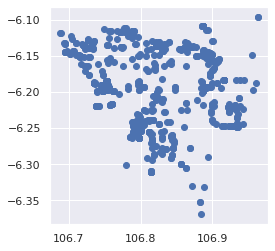

In [ ]:
gdf.plot()

In [ ]:
gdf.explore()

In [ ]:
poly = gpd.read_file("Batas_Wilayah_Administrasi__Area_.shp")
print(poly)

                               NAMOBJ       FCODE REMARK  \
0                      Kota Tangerang  BA03040060   None   
1   Kota Administrasi Jakarta Selatan  BA03040060   None   
2                          Kota Depok  BA03040060   None   
3                               Bogor  BA03040060   None   
4                              Bekasi  BA03040060   None   
5     Kota Administrasi Jakarta Barat  BA03040060   None   
6              Kota Tangerang Selatan  BA03040060   None   
7     Kota Administrasi Jakarta Pusat  BA03040060   None   
8     Kota Administrasi Jakarta Timur  BA03040060   None   
9                         Kota Bekasi  BA03040060   None   
10                          Tangerang  BA03040060   None   
11    Kota Administrasi Jakarta Utara  BA03040060   None   

                                  METADATA SRS_ID KDBBPS KDCBPS KDCPUM KDEBPS  \
0   TASWIL2500020210531_DATA_BATAS_KABKOTA   None   None   None   None   None   
1   TASWIL2500020210531_DATA_BATAS_KABKOTA   None   None 

In [ ]:
poly.drop([0,2,3,4,6,9,10],inplace=True)
poly.reset_index(inplace=True)

In [ ]:
poly.drop('index', axis=1)

,NAMOBJ,FCODE,REMARK,METADATA,SRS_ID,KDBBPS,KDCBPS,KDCPUM,KDEBPS,KDEPUM,...,WADMKD,WADMKK,WADMPR,WIADKC,WIADKK,WIADPR,WIADKD,SHAPE_AREA,SHAPE_LEN,geometry
0,Kota Administrasi Jakarta Selatan,BA03040060,None,TASWIL2500020210531_DATA_BATAS_KABKOTA,None,None,None,None,None,None,...,None,Kota Administrasi Jakarta Selatan,DKI Jakarta,None,None,None,0,0.011844,0.836978,"POLYGON Z ((106.84905 -6.20754 0.00000, 106.84..."
1,Kota Administrasi Jakarta Barat,BA03040060,None,TASWIL2500020210531_DATA_BATAS_KABKOTA,None,None,None,None,None,None,...,None,Kota Administrasi Jakarta Barat,DKI Jakarta,None,None,None,0,0.010213,0.607655,"POLYGON Z ((106.71146 -6.09602 0.00000, 106.71..."
2,Kota Administrasi Jakarta Pusat,BA03040060,None,TASWIL2500020210531_DATA_BATAS_KABKOTA,None,None,None,None,None,None,...,None,Kota Administrasi Jakarta Pusat,DKI Jakarta,None,None,None,0,0.003886,0.384854,"POLYGON Z ((106.87867 -6.16645 0.00000, 106.87..."
3,Kota Administrasi Jakarta Timur,BA03040060,None,TASWIL2500020210531_DATA_BATAS_KABKOTA,None,None,None,None,None,None,...,None,Kota Administrasi Jakarta Timur,DKI Jakarta,None,None,None,0,0.015161,1.042592,"POLYGON Z ((106.97148 -6.15448 0.00000, 106.97..."
4,Kota Administrasi Jakarta Utara,BA03040060,None,TASWIL2500020210531_DATA_BATAS_KABKOTA,None,None,None,None,None,None,...,None,Kota Administrasi Jakarta Utara,DKI Jakarta,None,None,None,0,0.012047,1.488074,"MULTIPOLYGON Z (((106.79336 -6.10067 0.00000, ..."


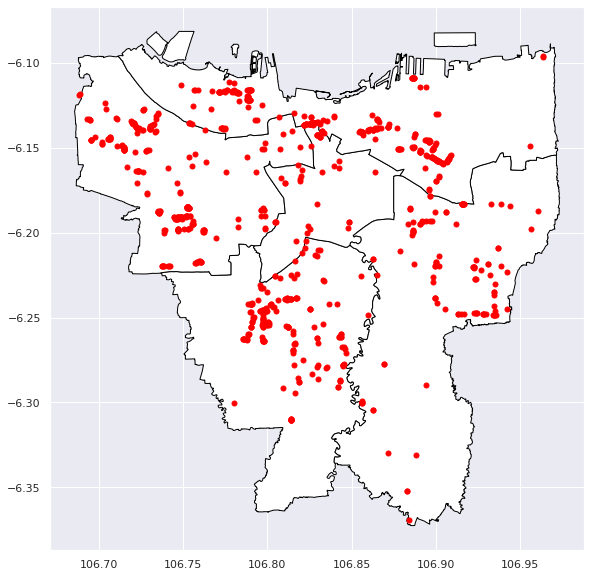

In [ ]:
 base = poly.plot(color='white', edgecolor='black',figsize=(10,10))

gdf.plot(ax=base,marker='o', color='Red', markersize=25)

In [ ]:
juv_points = np.array([(event.coords.xy[0][0],event.coords.xy[1][0]) for event in gdf["geometry"]]) # get x,y coordinates for all the points
juv_points

array([[106.8297705,  -6.1829329],
       [106.8222763,  -6.2090507],
       [106.8857235,  -6.2015525],
       ...,
       [106.7728119,  -6.1380346],
       [106.8203655,  -6.1632674],
       [106.8144183,  -6.1401787]])

In [ ]:
pp_juv = PointPattern(juv_points)
pp_juv

In [ ]:
q_r = QStatistic(pp_juv,shape= "rectangle",nx = 10, ny = 10)

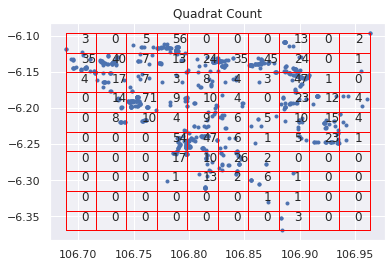

In [ ]:
q_r.plot()

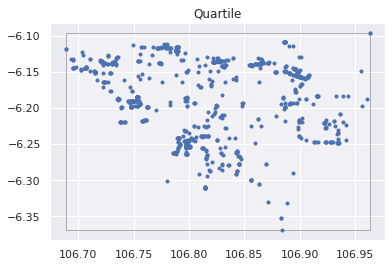

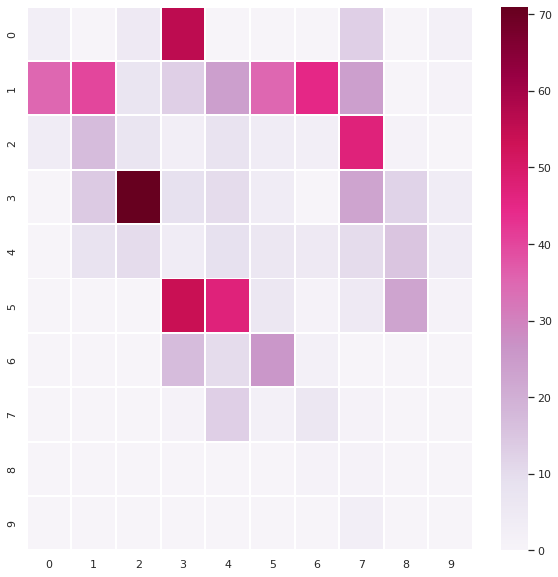

In [ ]:
import seaborn as sns; sns.set_theme()

x_min = q_r.mr.mbb[0]
y_min = q_r.mr.mbb[1]


# draw the point pattern along with its window
ax = q_r.mr.pp.plot(window=True, title="Quartile",
                  get_ax=True)
intersection_matrix = np.zeros([q_r.mr.count_column,q_r.mr.count_row])
for x in range(q_r.mr.count_column):
    for y in range(q_r.mr.count_row):
        cell_id = ((q_r.mr.count_column*q_r.mr.count_row)-1)-(y + x*q_r.mr.count_column)
        count = q_r.mr.point_location_sta()[cell_id]
        # print(f"{count}={cell_id}")
        intersection_matrix[x,((q_r.mr.count_row-1)-y)] = count

plt.figure(figsize=(10,10))
sns.heatmap(intersection_matrix,cmap="PuRd",linewidths=1,annot=False,cbar=True,xticklabels=True, yticklabels=True)

In [ ]:
q_r.chi2

2427.874251497006

In [ ]:
q_r.df

99

In [ ]:
q_r.chi2_pvalue

0.0

P Value = 0.0 < 0.05, sehingga kita tolak H0, maka data tidak tersebar acak


In [ ]:
import pointpats as pps

In [ ]:
from pointpats import PointPattern, PoissonPointProcess, as_window, g, f, j, k, l

In [ ]:
g_test = pps.g_test(
    juv_points, support=40, keep_simulations=True
)

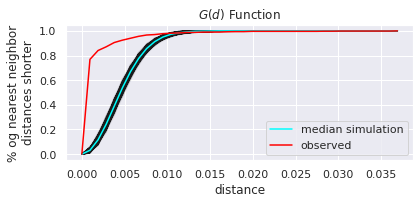

In [ ]:
g, ax = plt.subplots(figsize=(6, 3))

# plot all the simulations with very gine lines
ax.plot(
    g_test.support, g_test.simulations.T, color="k", alpha=0.01
)
# and show the average of simulations
ax.plot(
    g_test.support,
    np.median(g_test.simulations, axis=0),
    color="cyan",
    label="median simulation",
)


# and the observed pattern's G function
ax.plot(
    g_test.support, g_test.statistic, label="observed", color="red"
)

# clean up labels and axes
ax.set_xlabel("distance")
ax.set_ylabel("% og nearest neighbor\ndistances shorter")
ax.legend()
# ax.set_xlim(0, 2000)
ax.set_title(r"$G(d)$ Function")

g.tight_layout()
plt.show()

In [ ]:
f_test = pps.f_test(
    juv_points, support=40, keep_simulations=True
)

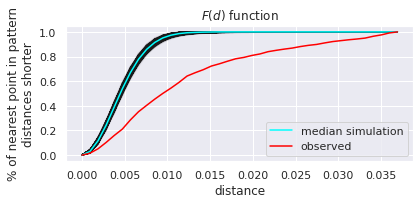

In [ ]:
f, ax = plt.subplots(figsize=(6, 3))

# plot all the simulations with very fine lines
ax.plot(
    f_test.support, f_test.simulations.T, color="k", alpha=0.01
)
# and show the average of simulations
ax.plot(
    f_test.support,
    np.median(f_test.simulations, axis=0),
    color="cyan",
    label="median simulation",
)


# and the observed pattern's F function
ax.plot(
    f_test.support, f_test.statistic, label="observed", color="red"
)

# clean up labels and axes
ax.set_xlabel("distance")
ax.set_ylabel("% of nearest point in pattern\ndistances shorter")
ax.legend()
# ax.set_xlim(0, 2000)
ax.set_title(r"$F(d)$ function")

f.tight_layout()
plt.show()

In [ ]:
k_test = pps.k_test(
    juv_points, support=40, keep_simulations=True
)

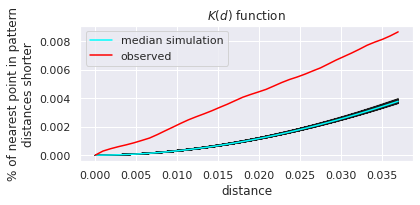

In [ ]:
k, ax = plt.subplots(figsize=(6, 3))

# plot all the simulations with very kine lines
ax.plot(
    k_test.support, k_test.simulations.T, color="k", alpha=0.01
)
# and show the average ok simulations
ax.plot(
    k_test.support,
    np.median(k_test.simulations, axis=0),
    color="cyan",
    label="median simulation",
)


# and the observed pattern's k kunction
ax.plot(
    k_test.support, k_test.statistic, label="observed", color="red"
)

# clean up labels and axes
ax.set_xlabel("distance")
ax.set_ylabel("% of nearest point in pattern\ndistances shorter")
ax.legend()
# ax.set_xlim(0, 2000)
ax.set_title(r"$K(d)$ function")

k.tight_layout()
plt.show()

In [ ]:
l_test = pps.l_test(
    juv_points, support=40, keep_simulations=True
)

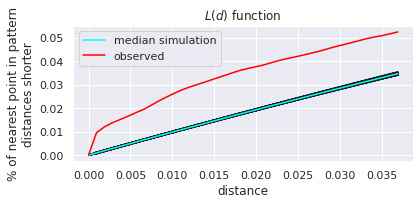

In [ ]:
l, ax = plt.subplots(figsize=(6, 3))

# plot all the simulations with very fine lines
ax.plot(
    l_test.support, l_test.simulations.T, color="k", alpha=0.01
)
# and show the average ol simulations
ax.plot(
    l_test.support,
    np.median(l_test.simulations, axis=0),
    color="cyan",
    label="median simulation",
)


# and the observed pattern's L function
ax.plot(
    l_test.support, l_test.statistic, label="observed", color="red"
)

# clean up labels and axes
ax.set_xlabel("distance")
ax.set_ylabel("% of nearest point in pattern\ndistances shorter")
ax.legend()
# ax.set_xlim(0, 1)
ax.set_title(r"$L(d)$ function")

l.tight_layout()
plt.show()